In [4]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# laoad the dataset
data=pd.read_csv("C:/Users/uig76897/Data science Projects/Data-Science-Projects-Boufaied/forecasting/store-sales-time-series-forecasting/train.csv")
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
#checikng for missing values
data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.describe()

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


In [11]:
# Unique values in the columns
data.nunique()

id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64

In [12]:
# Unique values in the 'family' column
data['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [13]:
#unique values in the 'store_nbr' column
data['store_nbr'].unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9])

## Data Preprocessing

In [9]:
#converting 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [14]:
# Filtering the data for the first store and family
data_store_family = data[(data['store_nbr'] == 9) & (data['family'] == 'AUTOMOTIVE')].copy()
data_store_family.head()

,id,date,store_nbr,family,sales,onpromotion
1749,1749,2013-01-01,9,AUTOMOTIVE,0.0,0
3531,3531,2013-01-02,9,AUTOMOTIVE,5.0,0
5313,5313,2013-01-03,9,AUTOMOTIVE,22.0,0
7095,7095,2013-01-04,9,AUTOMOTIVE,0.0,0
8877,8877,2013-01-05,9,AUTOMOTIVE,27.0,0


In [15]:
# checking if the date is contiguous
date_range = pd.date_range(start=data_store_family['date'].min(), end=data_store_family['date'].max())
#checking for missing dates
missing_dates = date_range.difference(data_store_family['date'])
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

the only missing dates areare Christmas dates. 
That’s actually expected because most stores are closed on Christmas so no sales are recorded.

In [16]:
# filling missing values with zero
data_store_family = data_store_family.set_index('date').asfreq('D').fillna(0).reset_index()
missing_dates_filled = date_range.difference(data_store_family['date'])
missing_dates_filled

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

## Exploratory Data Analysis (EDA)

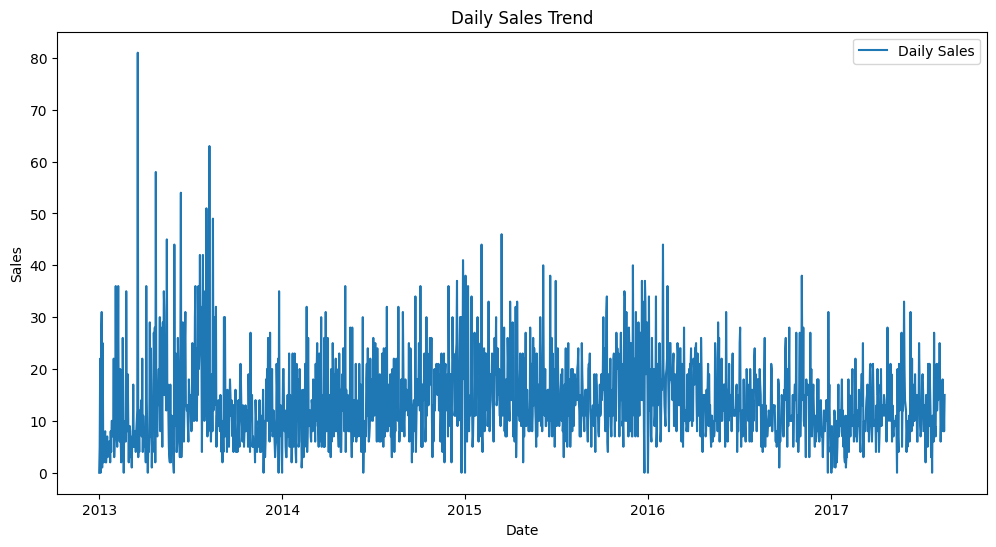

In [ ]:
# Plotting daily sales trend
plt.figure(figsize=(12, 6))
plt.plot(data_store_family['date'], data_store_family['sales'], label='Daily Sales')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

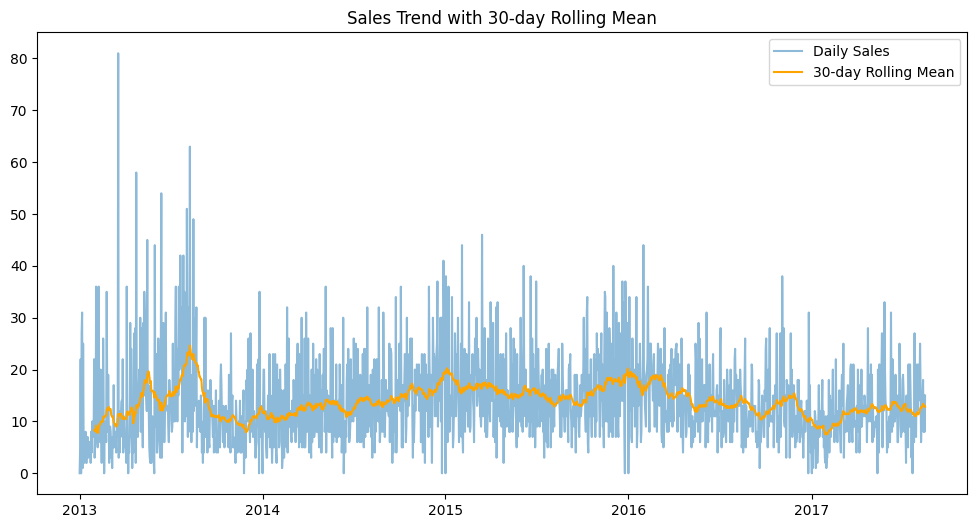

In [ ]:
# Visualizing long term sales patterns
#   Rolling mean
data_store_family['rolling_mean_30'] = data_store_family['sales'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(data_store_family['date'], data_store_family['sales'], label='Daily Sales', alpha=0.5)
plt.plot(data_store_family['date'], data_store_family['rolling_mean_30'], color='orange', label='30-day Rolling Mean')
plt.legend()
plt.title('Sales Trend with 30-day Rolling Mean')
plt.show()

<Axes: xlabel='date', ylabel='date'>

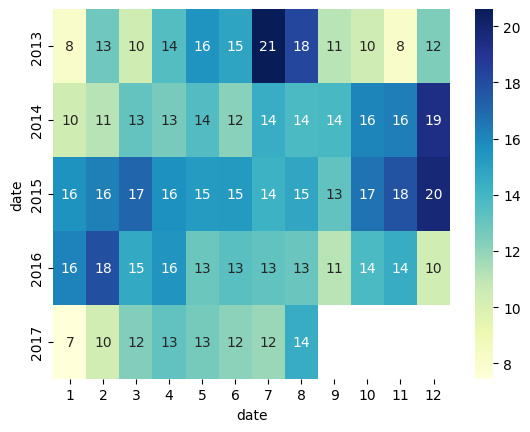

In [35]:
pivot = data_store_family.pivot_table(index=data_store_family['date'].dt.year,
                             columns=data_store_family['date'].dt.month,
                             values='sales', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')